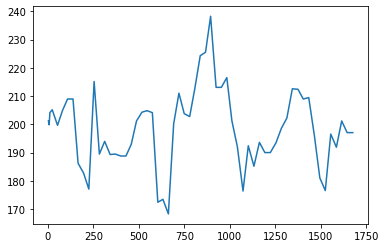

In [14]:
import matplotlib.pyplot as plt
import re

rpm = 34
ms_per_poll = 29
time_per_rotation = (60/34) * 1000
polls_per_rotation = int(time_per_rotation/ms_per_poll)

f = open("data_07_170605.log", "r")

testdata = "Distance: 188.79 Time: 429"

time = []
distance = []

for d in f.readlines():
    x = re.findall(r"[-+]?(?:\d*\.\d+|\d+)", d)
    distance.append(float(x[0]))
    time.append(float(x[1]))

plt.plot(time[0:60], distance[0:60])
plt.show()
